In [2]:
import pickle
text_train = pickle.load(open('/home/zilong.zhang1/AE_automation/preprocessing/result/ratio2/text_train.pkl','rb'))
text_test = pickle.load(open('/home/zilong.zhang1/AE_automation/preprocessing/result/ratio2/text_test.pkl','rb'))

In [3]:
import pickle
nopoint_abb_list = pickle.load(open('../preprocessing/abb_list_rep.pkl','rb'))
abb_list = pickle.load(open('../preprocessing/abb_list.pkl','rb'))

In [4]:
type(text_train[0])

list

In [5]:
from tqdm import tqdm
import re
clean_text_train = []
clean_text_test = []
merge_to = 20

In [6]:
for text in tqdm(text_train):
    tmp_doc = []
    buffer = ''
    cur_len = 0
    for line in text:
        line = re.sub(r'\n',' ',line)
        buffer = buffer + line+' ' 
        cur_len = cur_len + len(line.split())
        if cur_len>=merge_to:            
            if re.search(r'[a-zA-Z]\.[a-zA-Z]',buffer):
                for i in range(len(abb_list)):
                    buffer = re.sub(abb_list[i],nopoint_abb_list[i],buffer)
            tmp_doc.append(buffer)
            buffer = ''
            cur_len = 0
    if cur_len>0:
        tmp_doc.append(buffer)
    clean_text_train.append(tmp_doc)

100%|██████████| 2887/2887 [00:07<00:00, 389.51it/s]


In [7]:
clean_text_train[0]

['Admission Date: Discharge Date: Date of Birth: Sex: F Service: MEDICINE Allergies: Penicillins Attending: Chief Complaint: Shortness of breath Major Surgical or Invasive Procedure: Bedside fiberoptic laryngoscopy History of Present Illness: 52 y/o F with h/o Asthma, tobacco abuse, HTN, Depression, Anxiety, Chronic pain, insomnia, diverticulitis s/p partial colectomy, and gerd was found unresponsive at home by her roommate early this morning. ',
 'Every evening the patien takes Zyprexa, Ativan, and Percocet to help with her insomnia and after being found unresponsive was immediately brought to the ED where she was found to be moderately responsive but very groggy. ',
 'Pt reports coughing alot over night. No change in regular meds, and no new meds. No fevers/no chills. Patient felt well last night and at KFC for dinner. ',
 "She does note an increase in urination and feeling more thirsty yesterday, drinking water and soda. ED Course: Based on the patient's history she was given a dose

In [8]:
for text in tqdm(text_test):
    tmp_doc = []
    buffer = ''
    cur_len = 0
    for line in text:
        line = re.sub(r'\n',' ',line)
        buffer = buffer + line+' ' 
        cur_len = cur_len + len(line.split())
        if cur_len>=merge_to:            
            if re.search(r'[a-zA-Z]\.[a-zA-Z]',buffer):
                for i in range(len(abb_list)):
                    buffer = re.sub(abb_list[i],nopoint_abb_list[i],buffer)
            tmp_doc.append(buffer)
            buffer = ''
            cur_len = 0
    if cur_len>0:
        tmp_doc.append(buffer)
    clean_text_test.append(tmp_doc)

100%|██████████| 722/722 [00:01<00:00, 378.31it/s]


In [9]:
pickle.dump(clean_text_train,open('/home/zilong.zhang1/AE_automation/preprocessing/result/ratio2/merged_text_train.pkl','wb'))
pickle.dump(clean_text_test,open('/home/zilong.zhang1/AE_automation/preprocessing/result/ratio2/merged_text_test.pkl','wb'))

In [42]:
clean_text_test[0][0]

'Admission Date: Discharge Date: Service: Cardiothoracic Surgery HISTORY OF PRESENT ILLNESS: Ms. is an 85-year-old female who has a history of hypertension, coronary artery disease, hypercholesterolemia, and is status post a myocardial infarction in . '

In [43]:
len_stats = []
for doc in clean_text_train:
    for line in doc:
        len_stats.append(len(line.split()))

In [31]:
import numpy as np

In [37]:
np.mean(len_stats)

26.773096606613212

In [45]:
np.sum(np.array(len_stats)<20)

2213

In [47]:
len(len_stats)

168239

In [39]:
np.max(len_stats)

157

In [18]:
len(clean_text_train)

2887

In [25]:
clean_text_test[500]

['Admission Date: Discharge Date: Service: MEDICINE Allergies: Erythromycin Base / Metoprolol Tartrate / Keflex Attending: Chief Complaint: Shortness of breath Major Surgical or Invasive Procedure: none. ',
 'History of Present Illness: 89 year old female with history CHF(EF 40%), MI( - medically managed), chronic hyponatremia who presents from nursing home with hypotension, hypoxia, and progressive cough x 2 weeks. ',
 'No clear history of aspiration, but pt eats pureed food. No fever/chills, 88% on RA at nursing home, 89% on RA on arrival to ED, 99% on 3L NC. ',
 'In ED afebrile, BP initially 99/60, dropped to 79/50, improved to 106/70 with 2L NS bolus. Patient CXR was consitent with pulmonary edema. ',
 'She was given dose of levofloxacin, cefepime, and clinda for possible aspiration PNA. She uderwent CTA chest in the ED which showed multiple segmental and subsegmental pulmonary emboli in the bilateral lower lobes and patient was started on IV heparin and admitted to the ICU. ',
 'A

In [15]:
from tqdm import tqdm
import re
clean_text_train = []
clean_text_test = []
merge_to = 20
for text in tqdm(text_train):
    tmp_doc = []
    buffer = ''
    cur_len = 0
    for line in text:
        buffer = buffer + line+' ' 
        cur_len = cur_len + len(line.split())
        if cur_len>=merge_to:
            buffer = re.sub(r'\n',' ',buffer)
            if re.search(r'[a-zA-Z]\.[a-zA-Z]',buffer):
                for i in range(len(abb_list)):
                    buffer = re.sub(abb_list[i],nopoint_abb_list[i],buffer)
            tmp_doc.append(buffer)
            buffer = ''
            cur_len = 0
clean_text_train.append(tmp_doc)

['Admission Date: Discharge Date: Date of Birth: Sex: M Service: PRESENT ILLNESS: The patient is a 48 year old male who presented , at which time the patient had a laparoscopic cholecystectomy, a laparoscopic intraoperative ultrasound, and attempted laparoscopic segment 5 resection converted to open segment 5 resection adjacent to the gallbladder. ',
 'The operative note is dictated in detail by Dr. . At that point the patient was transferred to the intensive care unit and eventually transferred to the floor and discharged home. ',
 'The patient re-presented to the emergency room on with lethargy and severe dehydration. His - drain which he was sent home with was putting out approximately 1800 cc per day. ',
 'His admission creatinine was 4. His admission white blood cell count was 30. His AST was His ALT was His alkaline phosphatase was Bilirubin was 1. ',
 'Blood cultures were sent upon admission and revealed 4 out of 4 positive vials of methicillin sensitive staph aureus. Fluids sen

In [ ]:
des_filename = des_dir + 'clean_'+ str(start)
    #des_file = open(des_filename, 'a')
    start = int(start)
    local_seg = note_text[start:min(len(note_text),start+num)]
    local_clean_list = []
    for text in tqdm(local_seg):
        text = re.sub(r'\s*\[.*?\]\s*',' ',text)
        if re.search(r'[a-zA-Z]\.[a-zA-Z]',text):
            for i in range(len(abb_list)):
                text = re.sub(abb_list[i],nopoint_abb_list[i],text)
        text = re.sub(r'\n',' ',text)
        text = re.sub(r' :',':',text)
        #text = re.sub(r':\w',': ',text)
        text = re.sub(r'\s+',' ',text)
        local_clean_list.append(text)
    with open(des_filename,'wb') as f:
        pickle.dump(local_clean_list,f)

In [2]:
import pickle
merged_text_train = pickle.load(open('/home/zilong.zhang1/AE_automation/preprocessing/result/ratio2/merged_text_train.pkl','rb'))
merged_text_test = pickle.load(open('/home/zilong.zhang1/AE_automation/preprocessing/result/ratio2/merged_text_test.pkl','rb'))

In [3]:
text_train = pickle.load(open('/home/zilong.zhang1/AE_automation/preprocessing/result/ratio2/text_train.pkl','rb'))
text_test = pickle.load(open('/home/zilong.zhang1/AE_automation/preprocessing/result/ratio2/merged_text_test.pkl','rb'))

In [4]:
merged_len = []
original_len = []
for doc in merged_text_train:
    merged_len.append(len(doc))
for doc in merged_text_test:
    merged_len.append(len(doc))

for doc in text_train:
    original_len.append(len(doc))
for doc in text_test:
    original_len.append(len(doc))

In [6]:
import numpy as np
print(np.mean(merged_len))
print(np.mean(original_len))


59.494042671100026
170.65863119977834


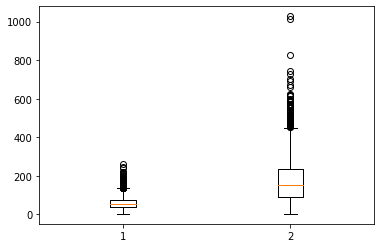

In [9]:
from matplotlib import pyplot as plt
data = [merged_len, original_len]
plt.boxplot(data)
plt.show()

In [10]:
np.max(merged_len)

262